<a href="https://colab.research.google.com/github/victornator25/Data-Science/blob/main/Linear_Regression_2_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])
df_target.head(3)

,target
0,151.0
1,75.0
2,141.0


In [12]:
#modelo lineal de una sola variable



# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi']]
y = df_target

# Separar los datos en muestras de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Construir modelo de regresión lineal
modelo_regresion_simple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_simple.fit(X_train, y_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y_pred = modelo_regresion_simple.predict(X_test)

In [9]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadrático medio (MSE): 4150.68
r2: 0.19


In [10]:
print('pendiente:', modelo_regresion_simple.coef_)
print('intercepto:', modelo_regresion_simple.intercept_)

pendiente: [[981.65543614]]
intercepto: [152.28824927]


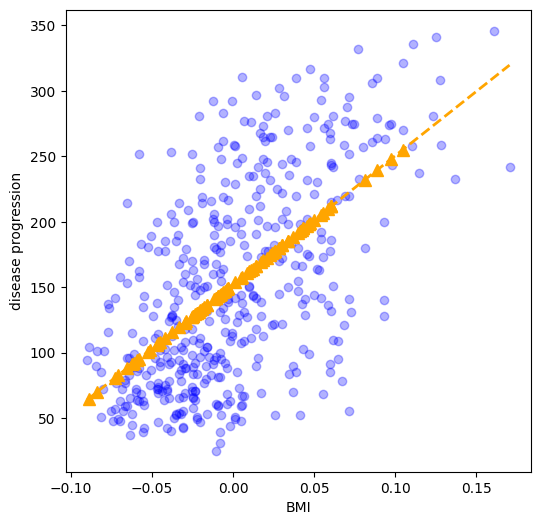

In [11]:
m = modelo_regresion_simple.coef_
b = modelo_regresion_simple.intercept_
z = np.linspace(X.min(), X.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression');

In [ ]:
#Modelo líneal con dos variables 



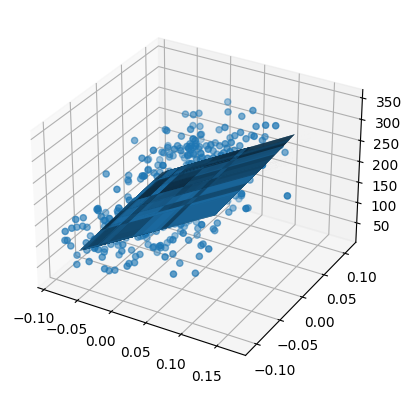

In [48]:
#modelo lineal de una sola variable



# Definir nuestras variables dependiente e independiente(s)
x1=df['bmi'].values.reshape(-1, 1)
x2=df['age'].values.reshape(-1, 1)

y = df_target.values


from mpl_toolkits.mplot3d import Axes3D

XX = np.concatenate((x1, x2), axis=1)

# Crear objeto LinearRegression
model = LinearRegression()

# Entrenar modelo
model.fit(XX, y)

# Hacer predicciones
y_pred = model.predict(XX)

# Graficar datos y línea de regresión
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y)
xx1, xx2 = np.meshgrid(x1, x2)
yy = model.coef_[0][0]*xx1 + model.coef_[0][1]*xx2 + model.intercept_
#yy = np.dot(model.coef_[0][], xx1) + np.dot(model.coef_[1], xx2) + model.intercept_
ax.plot_surface(xx1, xx2, yy, alpha=0.5)
plt.show()

In [44]:
model.coef_[0][0]



array([[924.81645876, 133.01372901]])

In [47]:
model.coef_[0][1]

133.01372901245273